# Thư viện sử dụng

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report



In [136]:
# Đọc dữ liệu
df = pd.read_csv('./data/seattle-weather.csv')

In [101]:
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


+ Dữ liệu thời tiết thành phố Seattle - Mỹ
- date : năm tháng ngày
- precipitation : Lượng mưa (mm)
- temp-max : Nhiệt độ cao nhất (°C)
- temp_min : Nhiệt độ thấp nhất (°C)
- wind : Gió (m/s)
- weather : Thời tiết

- Dữ liệu thời tiết trong vòng 4 năm (2012-2016)

In [102]:
df.shape

(1461, 6)

In [129]:
df_filtered = df[df["weather"].str.contains("snow")].value_counts

# Hiển thị DataFrame đã lọc
print(df_filtered)

<bound method DataFrame.value_counts of            date  precipitation  temp_max  temp_min  wind weather
13   2012-01-14            4.1       4.4       0.6   5.3    snow
14   2012-01-15            5.3       1.1      -3.3   3.2    snow
15   2012-01-16            2.5       1.7      -2.8   5.0    snow
16   2012-01-17            8.1       3.3       0.0   5.6    snow
17   2012-01-18           19.8       0.0      -2.8   5.0    snow
18   2012-01-19           15.2      -1.1      -2.8   1.6    snow
19   2012-01-20           13.5       7.2      -1.1   2.3    snow
56   2012-02-26            1.3       5.0      -1.1   3.4    snow
58   2012-02-28            3.6       6.7      -0.6   4.2    snow
59   2012-02-29            0.8       5.0       1.1   7.0    snow
65   2012-03-06            0.5       6.7       0.0   2.7    snow
71   2012-03-12           19.3       8.3       0.6   6.2    snow
72   2012-03-13            9.4       5.6       0.6   5.3    snow
74   2012-03-15           23.9      11.1       5.6

- rain: mưa
- sun: nắng
- fog: sương mù
- drizzle: mưa phùn
- snow: tuyết

Text(0.5, 1.0, 'Count of Weather Categories')

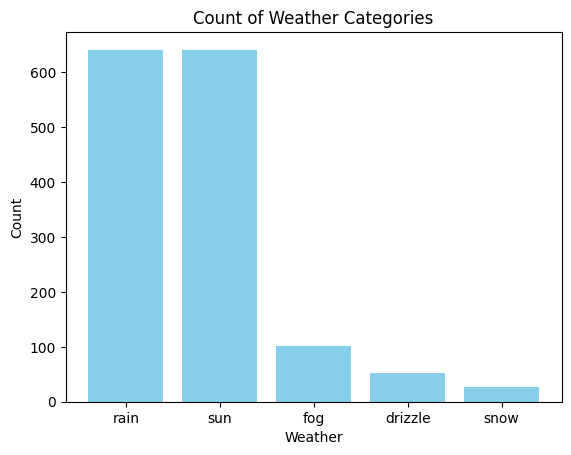

In [104]:
weather_counts = df['weather'].value_counts()
plt.bar(weather_counts.index, weather_counts.values, color='skyblue')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Categories')

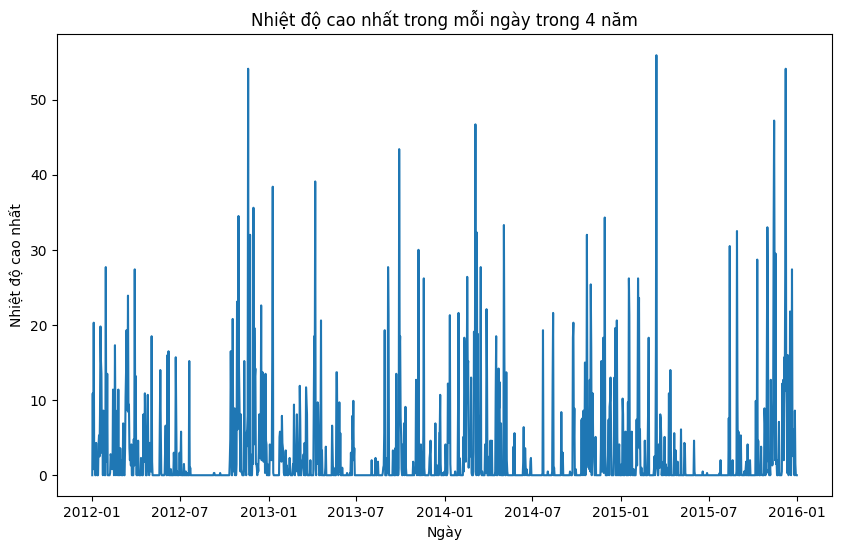

In [130]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['temp_max'])
plt.title('Nhiệt độ cao nhất trong mỗi ngày trong 4 năm')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ cao nhất')

plt.show()

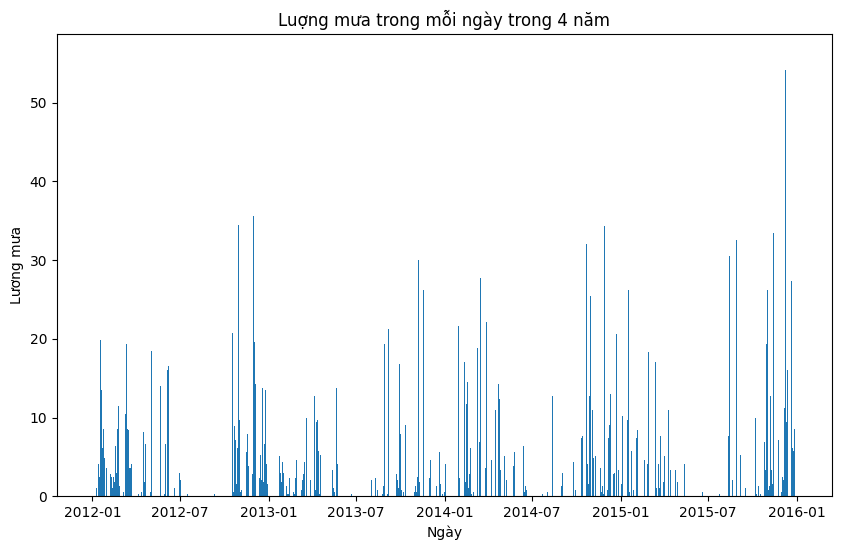

In [135]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10,6))
plt.bar(df['date'], df['precipitation'])
plt.title('Luợng mưa trong mỗi ngày trong 4 năm')
plt.xlabel('Ngày')
plt.ylabel('Lương mưa')

plt.show()

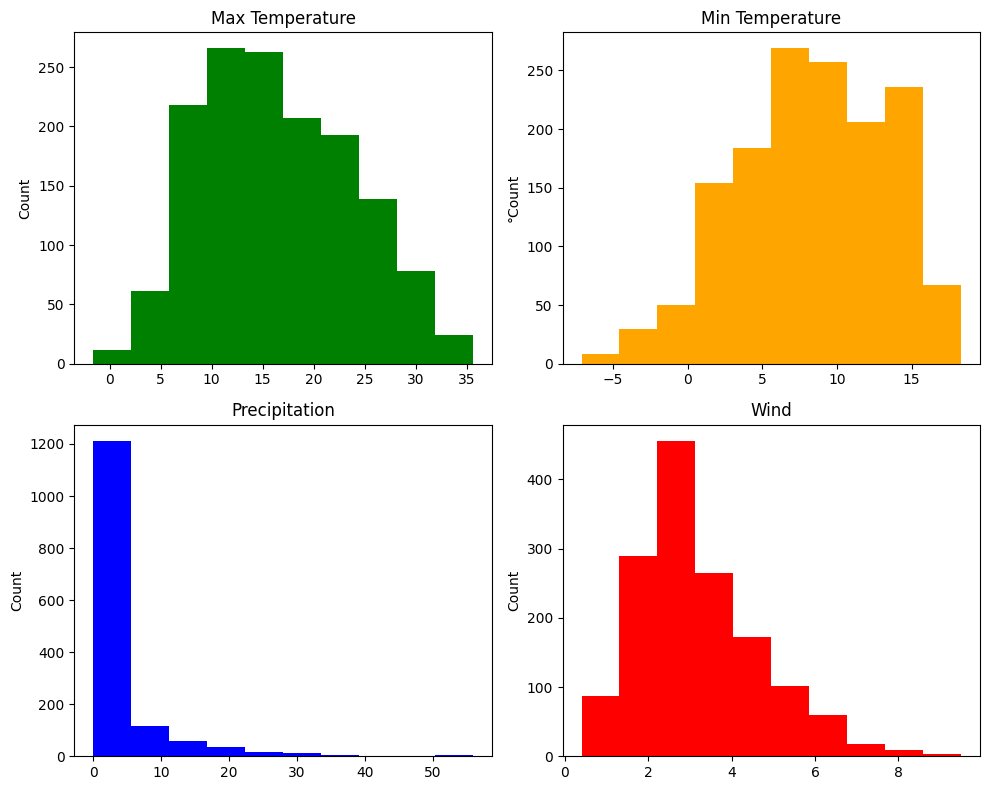

In [106]:
# Tạo một figure và các axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Vẽ histogram cho từng cột lên từng axes
df["temp_max"].plot(kind="hist", ax=axs[0, 0], title="Max Temperature", color='green')
axs[0, 0].set_ylabel("Count")

df["temp_min"].plot(kind="hist", ax=axs[0, 1], title="Min Temperature", color='orange')
axs[0, 1].set_ylabel("°Count")

df["precipitation"].plot(kind="hist", ax=axs[1, 0], title="Precipitation", color='blue')
axs[1, 0].set_ylabel("Count")

df["wind"].plot(kind="hist", ax=axs[1, 1], title="Wind", color='red')
axs[1, 1].set_ylabel("Count")

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [107]:
df.iloc[:,1:4]

,precipitation,temp_max,temp_min
0,0.0,12.8,5.0
1,10.9,10.6,2.8
2,0.8,11.7,7.2
3,20.3,12.2,5.6
4,1.3,8.9,2.8
...,...,...,...
1456,8.6,4.4,1.7
1457,1.5,5.0,1.7
1458,0.0,7.2,0.6
1459,0.0,5.6,-1.0


<Axes: >

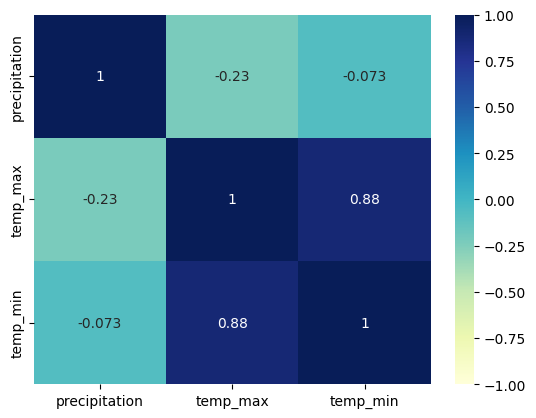

In [108]:

corr_matrix = df.iloc[:,1:4].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

In [109]:
df.isnull().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

# Các mô hình học máy

In [110]:
data = df.drop(["date"], axis = 1)

In [111]:
y = data['weather']
x = data[['temp_max', 'temp_min', 'precipitation', 'wind']]

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 9)


In [113]:
len(x_train),len(x_test)

(1022, 439)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [114]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel = rfmodel.fit(x_train, y_train)
rfscore = rfmodel.score(x_test, y_test)
print("Accuracy of KNN model is:",rfscore)


Accuracy of KNN model is: 0.8451025056947609


In [115]:
y_pred = rfmodel.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     drizzle       0.33      0.08      0.12        13
         fog       0.29      0.16      0.21        31
        rain       0.98      0.92      0.95       189
        snow       1.00      0.40      0.57         5
         sun       0.79      0.95      0.86       201

    accuracy                           0.85       439
   macro avg       0.68      0.50      0.54       439
weighted avg       0.83      0.85      0.83       439



- Optimize performance

In [116]:
df_filtered = df[df["weather"].str.contains("drizzle")].head(10)
# Hiển thị DataFrame đã lọc
print(df_filtered)

          date  precipitation  temp_max  temp_min  wind  weather
0   2012-01-01            0.0      12.8       5.0   4.7  drizzle
26  2012-01-27            0.0       6.7      -2.2   1.4  drizzle
45  2012-02-15            0.0       7.2       0.6   1.8  drizzle
85  2012-03-26            0.0      12.8       6.1   4.3  drizzle
103 2012-04-13            0.0      15.0       3.9   4.0  drizzle
118 2012-04-28            0.0      16.1       8.3   2.5  drizzle
135 2012-05-15            0.0      24.4       9.4   4.1  drizzle
175 2012-06-24            0.0      19.4       9.4   2.0  drizzle
186 2012-07-05            0.0      24.4      10.6   3.1  drizzle
191 2012-07-10            0.0      23.9      11.1   2.3  drizzle


In [117]:
rfmodel = RandomForestClassifier(criterion='entropy')
rfmodel = rfmodel.fit(x_train, y_train)
rfscore = rfmodel.score(x_test, y_test)
print("Accuracy of KNN model is:",rfscore)

Accuracy of KNN model is: 0.8428246013667426


In [118]:

acc = []
for n_estimators in range(1,100): 
    model = RandomForestClassifier(n_estimators=n_estimators)

    # train model 
    model = model.fit(x_train, y_train)

    # Evaluate model : accuracy
    accuracy = model.score(x_test, y_test)
    acc.append(accuracy)

Text(0.5, 1.0, 'Độ chính xác của Random Forest với n_estimators khác nhau')

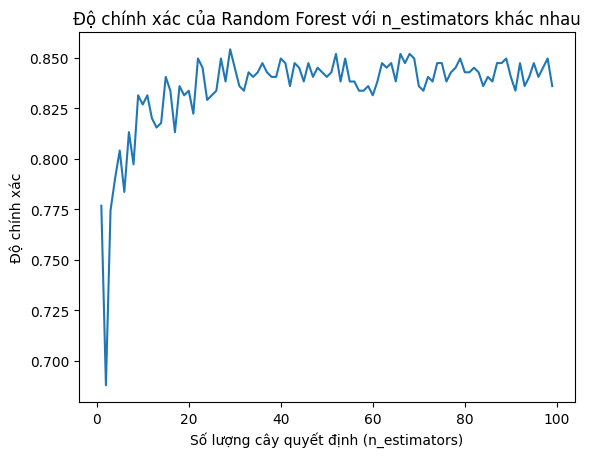

In [119]:
# Tạo biểu đồ đường
plt.plot(range(1,100), acc)

# Thiết lập nhãn và tiêu đề
plt.xlabel("Số lượng cây quyết định (n_estimators)")
plt.ylabel("Độ chính xác")
plt.title("Độ chính xác của Random Forest với n_estimators khác nhau")

- Mô hình KNN

In [120]:
knn = KNeighborsClassifier()
knnmodel = knn.fit(x_train, y_train)
knnscore = knn.score(x_test, y_test)
print("Accuracy of KNN model is:",knnscore)

Accuracy of KNN model is: 0.7425968109339408


In [121]:
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     drizzle       0.14      0.08      0.10        13
         fog       0.14      0.13      0.13        31
        rain       0.85      0.83      0.84       189
        snow       1.00      0.20      0.33         5
         sun       0.75      0.82      0.78       201

    accuracy                           0.74       439
   macro avg       0.58      0.41      0.44       439
weighted avg       0.74      0.74      0.73       439



In [122]:
knnacc = []
for k in range(1,50): 
    model = KNeighborsClassifier(n_neighbors=k)

    # train model 
    model = model.fit(x_train, y_train)


    # Evaluate model : accuracy
    knnaccuracy = model.score(x_test, y_test)
    knnacc.append(knnaccuracy)

Text(0.5, 1.0, 'KNN Accuracy vs k')

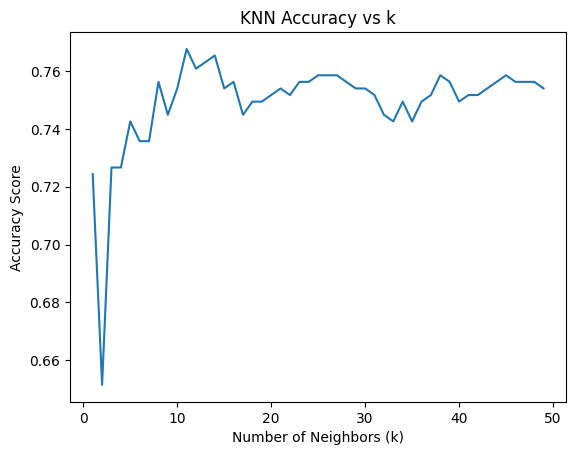

In [123]:
# Tạo biểu đồ đường
plt.plot(range(1,50), knnacc)

# Thiết lập nhãn và tiêu đề
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.title("KNN Accuracy vs k")

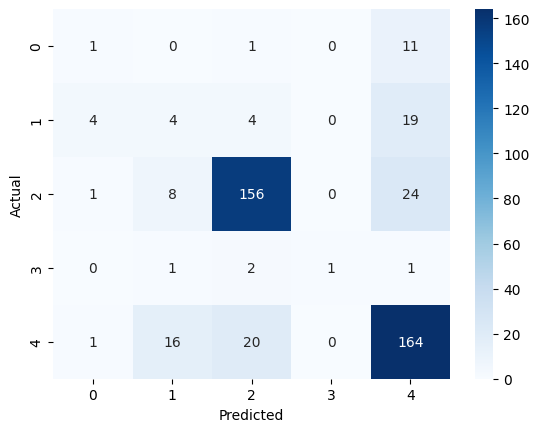

In [124]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [125]:

misclassified_indexes = np.where(y_test != y_pred)[0]
print(f'Misclassified indexes: {misclassified_indexes}')

Misclassified indexes: [  2  11  12  14  18  20  21  42  43  45  49  52  58  59  61  68  76  77
  87  92 109 111 116 121 123 127 131 132 134 137 138 141 145 148 151 152
 153 160 169 177 178 179 180 183 185 189 191 193 202 203 209 211 213 217
 218 219 227 236 240 241 249 250 251 252 254 256 260 261 266 267 268 274
 279 282 283 284 292 295 296 318 321 326 332 339 347 348 350 351 354 356
 360 361 366 369 380 383 386 390 391 392 395 396 399 400 407 409 410 417
 419 420 422 427 437]


In [126]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')


Cross-validation scores: [0.71707317 0.72682927 0.73039216 0.74509804 0.7745098 ]
Mean cross-validation score: 0.74
